<a href="https://colab.research.google.com/github/ai7dnn/2024-1-BDA/blob/main/inclass/05w_lect_ch06_dataframe_group_merge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%html
<!--마크다운 표 정렬 설정-->
<style> table {float:left} </style>

In [12]:
import pandas as pd
# 데이터프레임의 소수점 이하 n(2)자리 출력 설정
pd.set_option('display.precision', 2)

---

### 집단별로 요약하기

#### 전체 요약 통계량 구하기


In [1]:
!git clone https://github.com/ai7dnn/data.git

Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 24 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (24/24), 4.00 MiB | 5.96 MiB/s, done.


In [2]:
import pandas as pd

exam = pd.read_csv('data/exam.csv')
exam.sample(frac=.2)

,id,nclass,math,english,science
9,10,3,50,98,45
2,3,1,45,86,78
19,20,5,78,83,58
7,8,2,90,78,25


In [7]:
exam.agg("mean")

id         10.50
nclass      3.00
math       57.45
english    84.90
science    59.45
dtype: float64

In [8]:
exam.agg(["mean", "median"])

,id,nclass,math,english,science
mean,10.5,3.0,57.45,84.9,59.45
median,10.5,3.0,54.00,86.5,62.50


In [9]:
# math 평균 구하기
exam.agg(mean_math = ('math', 'mean'))

,math
mean_math,57.45


In [13]:
import numpy as np
df = pd.DataFrame([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9],
                   [np.nan, np.nan, 10]],
                   columns=['A', 'B', 'C'])
df

,A,B,C
0,1.0,2.0,3
1,4.0,5.0,6
2,7.0,8.0,9
3,NaN,NaN,10


In [14]:
df.agg(['sum', 'mean', 'median', 'min', 'max', 'count'])

,A,B,C
sum,12.0,15.0,28.0
mean,4.0,5.0,7.0
median,4.0,5.0,7.5
min,1.0,2.0,3.0
max,7.0,8.0,10.0
count,3.0,3.0,4.0


In [15]:
df.agg(['sum', 'mean', 'median', 'min', 'max'], axis=0)

,A,B,C
sum,12.0,15.0,28.0
mean,4.0,5.0,7.0
median,4.0,5.0,7.5
min,1.0,2.0,3.0
max,7.0,8.0,10.0


In [16]:
df.agg(['sum', 'mean', 'median', 'min', 'max'], axis=1)

,sum,mean,median,min,max
0,6.0,2.0,2.0,1.0,3.0
1,15.0,5.0,5.0,4.0,6.0
2,24.0,8.0,8.0,7.0,9.0
3,10.0,10.0,10.0,10.0,10.0


In [17]:
pd.Series([np.nan, np.nan, np.nan, 5]).mean()

5.0

In [19]:
df

,A,B,C
0,1.0,2.0,3
1,4.0,5.0,6
2,7.0,8.0,9
3,NaN,NaN,10


In [20]:
df.agg({'A' : ['sum', 'min'], 'B' : ['min', 'max']})

,A,B
sum,12.0,NaN
min,1.0,2.0
max,NaN,8.0


In [22]:
df.agg(x=('A', 'max'), y=('B', 'min'), z=('C', 'mean')) # 인자 행명 = ("열명", "적용함수")

,A,B,C
x,7.0,NaN,NaN
y,NaN,2.0,NaN
z,NaN,NaN,7.0


In [25]:
df.agg("mean", axis="columns")

0     2.0
1     5.0
2     8.0
3    10.0
dtype: float64

In [26]:
df.agg("mean", axis="index")

A    4.0
B    5.0
C    7.0
dtype: float64

In [27]:
df.agg(["sum", "mean"], axis="columns")

,sum,mean
0,6.0,2.0
1,15.0,5.0
2,24.0,8.0
3,10.0,10.0


In [28]:
df.agg(["sum", "mean"], axis="index")

,A,B,C
sum,12.0,15.0,28.0
mean,4.0,5.0,7.0


#### 집단별 요약 통계량 구하기



In [29]:
# nclass별로 분리하기
# math 평균 구하기
exam.groupby('nclass') \
    .agg(mean_math = ('math', 'mean'))

,mean_math
nclass,
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


In [30]:
exam.groupby('nclass').mean()

,id,math,english,science
nclass,,,,
1,2.5,46.25,94.75,61.50
2,6.5,61.25,84.25,58.25
3,10.5,45.00,86.50,39.25
4,14.5,56.75,84.75,55.00
5,18.5,78.00,74.25,83.25


In [ ]:
exam.groupby('nclass').mean()['math']

nclass
1    46.25
2    61.25
3    45.00
4    56.75
5    78.00
Name: math, dtype: float64

In [ ]:
exam.groupby('nclass').mean()[['math']]

,math
nclass,
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


In [ ]:
# list of functions and/or function names, e.g. [np.sum, 'mean']
exam.groupby('nclass').agg("mean")

,id,math,english,science
nclass,,,,
1,2.5,46.25,94.75,61.50
2,6.5,61.25,84.25,58.25
3,10.5,45.00,86.50,39.25
4,14.5,56.75,84.75,55.00
5,18.5,78.00,74.25,83.25


In [ ]:
exam.groupby('nclass').agg(["mean", "median"])

id          math        english        science       
        mean median   mean median    mean median    mean median
nclass                                                         
1        2.5    2.5  46.25   47.5   94.75   97.5   61.50   59.0
2        6.5    6.5  61.25   65.0   84.25   84.5   58.25   55.0
3       10.5   10.5  45.00   47.5   86.50   91.5   39.25   38.5
4       14.5   14.5  56.75   53.0   84.75   92.5   55.00   65.0
5       18.5   18.5  78.00   79.0   74.25   73.0   83.25   88.5

In [ ]:
# 인자 사용 방법: 열 이름은 키워드인 반면, 값 ('열명', '함수명')은 열에서 값을 계산하는 데 사용되는 함수 이름
# 새_열이름 = ('열명', '함수명')
exam.groupby('nclass').agg(mean_math = ('math', 'mean'))

,mean_math
nclass,
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


In [ ]:
exam.groupby('nclass').agg(math = ('math', 'mean'))

,math
nclass,
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


In [ ]:
# 인자 사용 방법: 사전 형식
# {'열명': '함수명'}
exam.groupby('nclass').agg({'math': 'mean'})

,math
nclass,
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


In [ ]:
# dict of axis labels -> functions, function names or list of such.
# {'열명': ['함수명1', '함수명2', ...]}
exam.groupby('nclass').agg({'math': ['mean', 'min', 'max']})

math        
         mean min max
nclass               
1       46.25  30  60
2       61.25  25  90
3       45.00  20  65
4       56.75  46  75
5       78.00  65  89

------------------------------------------------------------------------

#### (알아 두면 좋아요) 변수를 인덱스로 바꾸지 않기

In [31]:
 # 시험 예상
 exam.groupby('nclass', as_index = False) \
    .agg(mean_math = ('math', 'mean'))

,nclass,mean_math
0,1,46.25
1,2,61.25
2,3,45.00
3,4,56.75
4,5,78.00


In [ ]:
 exam.groupby('nclass').agg(mean_math = ('math', 'mean'))

,mean_math
nclass,
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


### DataFrameGroupBy 객체

In [ ]:
type(exam.groupby('nclass'))

pandas.core.groupby.generic.DataFrameGroupBy

In [ ]:
exam.sample(5) # 임의의 행 수

,id,nclass,math,english,science
14,15,4,75,56,78
4,5,2,25,80,65
8,9,3,20,98,15
16,17,5,65,68,98
9,10,3,50,98,45


In [ ]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
exam.groupby('nclass') # 객체 DataFrameGroupBy

In [ ]:
list(exam.groupby('nclass'))

[(1,
     id  nclass  math  english  science
  0   1       1    50       98       50
  1   2       1    60       97       60
  2   3       1    45       86       78
  3   4       1    30       98       58),
 (2,
     id  nclass  math  english  science
  4   5       2    25       80       65
  5   6       2    50       89       98
  6   7       2    80       90       45
  7   8       2    90       78       25),
 (3,
      id  nclass  math  english  science
  8    9       3    20       98       15
  9   10       3    50       98       45
  10  11       3    65       65       65
  11  12       3    45       85       32),
 (4,
      id  nclass  math  english  science
  12  13       4    46       98       65
  13  14       4    48       87       12
  14  15       4    75       56       78
  15  16       4    58       98       65),
 (5,
      id  nclass  math  english  science
  16  17       5    65       68       98
  17  18       5    80       78       90
  18  19       5    89       68   

In [ ]:
list(exam.groupby('nclass'))[0][1]

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58


In [ ]:
for key, value in exam.groupby('nclass'):
    print(key, "\n")
    print(type(value))
    print(value, "\n", "-"*40, "\n")

1 

<class 'pandas.core.frame.DataFrame'>
   id  nclass  math  english  science
0   1       1    50       98       50
1   2       1    60       97       60
2   3       1    45       86       78
3   4       1    30       98       58 
 ---------------------------------------- 

2 

<class 'pandas.core.frame.DataFrame'>
   id  nclass  math  english  science
4   5       2    25       80       65
5   6       2    50       89       98
6   7       2    80       90       45
7   8       2    90       78       25 
 ---------------------------------------- 

3 

<class 'pandas.core.frame.DataFrame'>
    id  nclass  math  english  science
8    9       3    20       98       15
9   10       3    50       98       45
10  11       3    65       65       65
11  12       3    45       85       32 
 ---------------------------------------- 

4 

<class 'pandas.core.frame.DataFrame'>
    id  nclass  math  english  science
12  13       4    46       98       65
13  14       4    48       87       12
14  1

------------------------------------------------------------------------

#### 여러 요약 통계량 한 번에 구하기



In [ ]:
# nclass별로 분리
# 수학 점수 평균
# 수학 점수 합계
# 수학 점수 중앙값
# 빈도(학생 수)
exam.groupby('nclass') \
    .agg(mean_math   = ('math', 'mean'),
         sum_math    = ('math', 'sum'),
         median_math = ('math', 'median'),
         n           = ('nclass', 'count'))

,mean_math,sum_math,median_math,n
nclass,,,,
1,46.25,185,47.5,4
2,61.25,245,65.0,4
3,45.00,180,47.5,4
4,56.75,227,53.0,4
5,78.00,312,79.0,4


---

### (알아 두면 좋아요) 모든 변수의 요약 통계량 한 번에 구하기

In [ ]:
exam.groupby('nclass').mean()

,id,math,english,science
nclass,,,,
1,2.5,46.25,94.75,61.50
2,6.5,61.25,84.25,58.25
3,10.5,45.00,86.50,39.25
4,14.5,56.75,84.75,55.00
5,18.5,78.00,74.25,83.25


In [ ]:
exam.groupby('nclass').agg(['mean', 'median'])

id          math        english        science       
        mean median   mean median    mean median    mean median
nclass                                                         
1        2.5    2.5  46.25   47.5   94.75   97.5   61.50   59.0
2        6.5    6.5  61.25   65.0   84.25   84.5   58.25   55.0
3       10.5   10.5  45.00   47.5   86.50   91.5   39.25   38.5
4       14.5   14.5  56.75   53.0   84.75   92.5   55.00   65.0
5       18.5   18.5  78.00   79.0   74.25   73.0   83.25   88.5

------------------------------------------------------------------------

In [ ]:
exam.groupby('nclass')[['id']].count() # DataFrame

,id
nclass,
1,4
2,4
3,4
4,4
5,4


In [ ]:
exam.groupby('nclass')['id'].count() # Series

nclass
1    4
2    4
3    4
4    4
5    4
Name: id, dtype: int64

In [ ]:
exam.groupby('nclass').count()

,id,math,english,science
nclass,,,,
1,4,4,4,4
2,4,4,4,4
3,4,4,4,4
4,4,4,4,4
5,4,4,4,4


In [ ]:
exam.groupby('nclass').count()[['id']]

,id
nclass,
1,4
2,4
3,4
4,4
5,4


### 집단별로 다시 집단 나누기

In [32]:
import pandas as pd

mpg = pd.read_csv('data/mpg.csv')
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [33]:
# 제조 회사 및 구동 방식별 분리
# cty 평균 구하기
mpg.groupby(['manufacturer', 'drv']).agg(mean_cty = ('cty', 'mean'))

mean_cty
manufacturer drv          
audi         4       16.82
             f       18.86
chevrolet    4       12.50
             f       18.80
             r       14.10
dodge        4       12.00
             f       15.82
ford         4       13.31
             r       14.75
honda        f       24.44
hyundai      f       18.64
jeep         4       13.50
land rover   4       11.50
lincoln      r       11.33
mercury      4       13.25
nissan       4       13.75
             f       20.00
pontiac      f       17.00
subaru       4       19.29
toyota       4       14.93
             f       21.37
volkswagen   f       20.93

In [35]:
mpg.groupby(['manufacturer', 'category']).agg(mean_cty = ('cty', 'mean'), mean_hwy = ('hwy', 'mean'))

mean_cty  mean_hwy
manufacturer category                      
audi         compact        17.93     26.93
             midsize        16.00     24.00
chevrolet    2seater        15.40     24.80
             midsize        18.80     27.60
             suv            12.67     17.11
dodge        minivan        15.82     22.36
             pickup         12.05     16.11
             suv            11.86     16.00
ford         pickup         13.00     16.43
             subcompact     15.89     23.22
             suv            12.89     17.78
honda        subcompact     24.44     32.56
hyundai      midsize        19.00     27.71
             subcompact     18.29     26.00
jeep         suv            13.50     17.62
land rover   suv            11.50     16.50
lincoln      suv            11.33     17.00
mercury      suv            13.25     18.00
nissan       compact        20.00     28.00
             midsize        20.00     27.43
             suv            13.75     18.00
pontiac      midsize        17.00     26.40
subaru       compact        19.75     26.00
             subcompact     19.50     26.00
             suv            18.83     25.00
toyota       compact        22.25     30.58
             midsize        19.86     28.29
             pickup         15.57     19.43
             suv            14.38     18.25
volkswagen   compact        20.79     28.50
             midsize        18.57     27.57
             subcompact     24.00     32.83

In [36]:
## audi의 drv별 빈도

# audi 추출
# drv별 분리
# 빈도 구하기
mpg.query('manufacturer == "audi"') \
   .groupby(['drv']).agg(n = ('drv', 'count'))

,n
drv,
4,11
f,7


In [37]:
## chevrolet의 drv별 빈도

# chevrolet 추출
# drv별 분리
# 빈도 구하기
mpg.query('manufacturer == "chevrolet"') \
   .groupby(['drv']).agg(n = ('drv', 'count'))

,n
drv,
4,4
f,5
r,10


In [38]:
mpg.query('manufacturer == "chevrolet"').groupby(['drv']).count()

,manufacturer,model,displ,year,cyl,trans,cty,hwy,fl,category
drv,,,,,,,,,,
4,4,4,4,4,4,4,4,4,4,4
f,5,5,5,5,5,5,5,5,5,5
r,10,10,10,10,10,10,10,10,10,10


In [39]:
mpg.query('manufacturer == "chevrolet"').groupby(['drv']).count()[['model']]

,model
drv,
4,4
f,5
r,10


In [40]:
mpg.query('manufacturer == "chevrolet"').groupby(['drv']).count()[['model']].rename(columns = {'model' : 'n'})

,n
drv,
4,4
f,5
r,10


------------------------------------------------------------------------

#### (알아 두면 좋아요) `value_counts()`로 집단별 빈도 간단하게 구하기

In [41]:
mpg.groupby('drv').agg(n = ('drv', 'count'))

,n
drv,
4,103
f,106
r,25


In [42]:
mpg[['drv', 'cyl']].value_counts()

drv  cyl
f    4      58
4    8      48
f    6      43
4    6      32
     4      23
r    8      21
f    5       4
r    6       4
f    8       1
dtype: int64

In [43]:
mpg[['drv', 'cyl']].value_counts().to_frame()

0
drv cyl    
f   4    58
4   8    48
f   6    43
4   6    32
    4    23
r   8    21
f   5     4
r   6     4
f   8     1

In [44]:
mpg['drv'].value_counts().query('n > 100') # 오류 발생

AttributeError: 'Series' object has no attribute 'query'

In [ ]:
mpg['drv'].value_counts().to_frame().query('drv > 100')

,drv
f,106
4,103


In [ ]:
# drv 빈도 구하기
# 데이터 프레임으로 바꾸기, 변수명 n으로 바꾸기
# axis 이름에 drv 지정
# n이 100을 초과한 경우 추출
mpg['drv'].value_counts() \
          .to_frame('n') \
          .rename_axis('drv') \
          .query('n > 100')

,n
drv,
f,106
4,103


In [ ]:
mpg['drv'].value_counts().to_frame('n') # 열 제목

,n
f,106
4,103
r,25


In [ ]:
mpg['drv'].value_counts().to_frame('n').rename_axis('drv') # index의 제목 수정

,n
drv,
f,106
4,103
r,25


In [ ]:
mpg.groupby('drv').agg(n = ('drv', 'count'))

,n
drv,
4,103
f,106
r,25


In [ ]:
mpg.groupby('drv').agg(n = ('drv', 'count')).query('n > 100')

,n
drv,
4,103
f,106


------------------------------------------------------------------------

### `pandas` 함수 조합하기

In [ ]:
# suv 추출
# 합산 연비 변수 만들기
# 제조 회사별로 분리
# 합산 연비 평균 구하기
# 내림차순 정렬
# 1~5위까지 출력, 시험 예상
mpg.query('category == "suv"') \
   .assign(total = (mpg['hwy'] + mpg['cty']) / 2) \
   .groupby('manufacturer') \
   .agg(mean_tot = ('total', 'mean')) \
   .sort_values('mean_tot', ascending = False) \
   .head()

,mean_tot
manufacturer,
subaru,21.916667
toyota,16.312500
nissan,15.875000
mercury,15.625000
jeep,15.562500


In [ ]:
mpg.query('category == "suv"') \
   .assign(total = (mpg['hwy'] + mpg['cty']) / 2) \
   .groupby('manufacturer') \
   .agg(mean_tot = ('total', 'mean')) \
   .sort_values('mean_tot', ascending = False)

,mean_tot
manufacturer,
subaru,21.916667
toyota,16.312500
nissan,15.875000
mercury,15.625000
jeep,15.562500
ford,15.333333
chevrolet,14.888889
lincoln,14.166667
land rover,14.000000


## 혼자서 해보기

In [ ]:
import pandas as pd

mpg = pd.read_csv('data/mpg.csv')
mpg.groupby('category').agg(mean_cty = ('cty', 'mean'))

,mean_cty
category,
2seater,15.400000
compact,20.127660
midsize,18.756098
minivan,15.818182
pickup,13.000000
subcompact,20.371429
suv,13.500000


In [ ]:
mpg.groupby('category').agg(mean_cty = ('cty', 'mean')).sort_values('mean_cty', ascending = False)

,mean_cty
category,
subcompact,20.371429
compact,20.127660
midsize,18.756098
minivan,15.818182
2seater,15.400000
suv,13.500000
pickup,13.000000


In [ ]:
mpg.groupby('manufacturer').agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
manufacturer,
audi,26.444444
chevrolet,21.894737
dodge,17.945946
ford,19.360000
honda,32.555556
hyundai,26.857143
jeep,17.625000
land rover,16.500000
lincoln,17.000000


In [ ]:
mpg.groupby('manufacturer').agg(mean_hwy = ('hwy', 'mean')).sort_values('mean_hwy', ascending = False).head(3)

,mean_hwy
manufacturer,
honda,32.555556
volkswagen,29.222222
hyundai,26.857143


In [ ]:
mpg.query('category == "compact"').groupby('manufacturer').agg(n = ('manufacturer', 'count'))

,n
manufacturer,
audi,15
nissan,2
subaru,4
toyota,12
volkswagen,14


In [ ]:
mpg.query('category == "compact"').groupby('manufacturer') \
   .agg(n = ('manufacturer', 'count')).sort_values('n', ascending = False).head(3)

,n
manufacturer,
audi,15
volkswagen,14
toyota,12


In [ ]:
mpg.query('category == "compact"').value_counts('manufacturer').to_frame('n')

,n
manufacturer,
audi,15
volkswagen,14
toyota,12
subaru,4
nissan,2


In [ ]:
mpg.query('category == "compact"').value_counts('manufacturer').to_frame('n').sort_values('n', ascending = False)

,n
manufacturer,
audi,15
volkswagen,14
toyota,12
subaru,4
nissan,2


In [ ]:
# 시험 예상
mpg.groupby(['manufacturer', 'category']) \
  .agg(mean_cty = ('cty', 'mean')) \
  .sort_values('mean_cty', ascending = False)

mean_cty
manufacturer category             
honda        subcompact  24.444444
volkswagen   subcompact  24.000000
toyota       compact     22.250000
volkswagen   compact     20.785714
nissan       compact     20.000000
             midsize     20.000000
toyota       midsize     19.857143
subaru       compact     19.750000
             subcompact  19.500000
hyundai      midsize     19.000000
subaru       suv         18.833333
chevrolet    midsize     18.800000
volkswagen   midsize     18.571429
hyundai      subcompact  18.285714
audi         compact     17.933333
pontiac      midsize     17.000000
audi         midsize     16.000000
ford         subcompact  15.888889
dodge        minivan     15.818182
toyota       pickup      15.571429
chevrolet    2seater     15.400000
toyota       suv         14.375000
nissan       suv         13.750000
jeep         suv         13.500000
mercury      suv         13.250000
ford         pickup      13.000000
             suv         12.888889
chevrolet    suv         12.666667
dodge        pickup      12.052632
             suv         11.857143
land rover   suv         11.500000
lincoln      suv         11.333333

---

## 06-7 데이터 합치기

### 가로로 합치기 merge(): 행의 선택은?

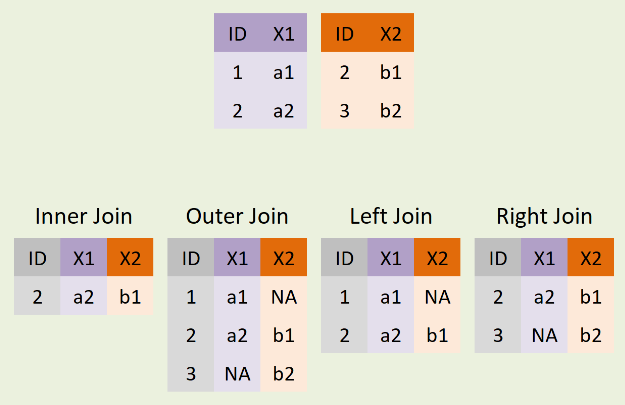

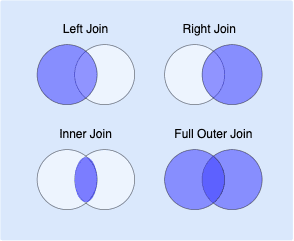

In [45]:
# 중간고사 데이터 만들기
test1 = pd.DataFrame({'id'      : [1, 2, 3, 4, 5],
                      'midterm' : [60, 80, 70, 90, 85]})

# 기말고사 데이터 만들기
test2 = pd.DataFrame({'id'    : [1, 2, 3, 4, 5],
                      'final' : [70, 83, 65, 95, 80]})

In [ ]:
test1  # test1 출력

,id,midterm
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85


In [ ]:
test2  # test2 출력

,id,final
0,1,70
1,2,83
2,3,65
3,4,95
4,5,80


In [ ]:
# id 기준으로 합쳐서 total에 할당
total = pd.merge(test1, test2, how = 'left', on = 'id')
total

,id,midterm,final
0,1,60,70
1,2,80,83
2,3,70,65
3,4,90,95
4,5,85,80


In [ ]:
total = pd.merge(test1, test2, how = 'left')
total

,id,midterm,final
0,1,60,70
1,2,80,83
2,3,70,65
3,4,90,95
4,5,85,80


In [ ]:
total = pd.merge(test1, test2)
total

,id,midterm,final
0,1,60,70
1,2,80,83
2,3,70,65
3,4,90,95
4,5,85,80


#### 다른 데이터를 활용해 변수 추가하기

In [ ]:
name = pd.DataFrame({'nclass'  : [1, 2, 3, 4, 5],
                     'teacher' : ['kim', 'lee', 'park', 'choi', 'jung']})
name

,nclass,teacher
0,1,kim
1,2,lee
2,3,park
3,4,choi
4,5,jung


In [ ]:
exam.sample(5)

,id,nclass,math,english,science
17,18,5,80,78,90
14,15,4,75,56,78
1,2,1,60,97,60
16,17,5,65,68,98
4,5,2,25,80,65


In [ ]:
# nclass 기준으로 합쳐서 exam_new에 할당
exam_new = pd.merge(exam, name, how = 'left', on = 'nclass')
exam_new

,id,nclass,math,english,science,teacher
0,1,1,50,98,50,kim
1,2,1,60,97,60,kim
2,3,1,45,86,78,kim
3,4,1,30,98,58,kim
4,5,2,25,80,65,lee
5,6,2,50,89,98,lee
6,7,2,80,90,45,lee
7,8,2,90,78,25,lee
8,9,3,20,98,15,park
9,10,3,50,98,45,park


In [ ]:
exam_new = pd.merge(exam, name, how = 'left')
exam_new

,id,nclass,math,english,science,teacher
0,1,1,50,98,50,kim
1,2,1,60,97,60,kim
2,3,1,45,86,78,kim
3,4,1,30,98,58,kim
4,5,2,25,80,65,lee
5,6,2,50,89,98,lee
6,7,2,80,90,45,lee
7,8,2,90,78,25,lee
8,9,3,20,98,15,park
9,10,3,50,98,45,park


### 세로로 합치기: concat()

In [ ]:
# 학생 1~5번 시험 데이터 만들기
group_a = pd.DataFrame({'id'   : [1, 2, 3, 4, 5],
                        'test' : [60, 80, 70, 90, 85]})

# 학생 6~10번 시험 데이터 만들기
group_b = pd.DataFrame({'id'   : [6, 7, 8, 9, 10],
                        'test' : [70, 83, 65, 95, 80]})

In [ ]:
group_a  # group_a 출력

,id,test
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85


In [ ]:
group_b  # group_b 출력

,id,test
0,6,70
1,7,83
2,8,65
3,9,95
4,10,80


In [ ]:
# 데이터 합쳐서 group_all에 할당
group_all = pd.concat([group_a, group_b])
group_all

,id,test
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
0,6,70
1,7,83
2,8,65
3,9,95
4,10,80


In [ ]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
group_all.reset_index() # 원 index가 열로 이동, 새로운 시퀀스 지정

,index,id,test
0,0,1,60
1,1,2,80
2,2,3,70
3,3,4,90
4,4,5,85
5,0,6,70
6,1,7,83
7,2,8,65
8,3,9,95
9,4,10,80


In [ ]:
group_all.reset_index(drop=True) # 원 index 제거, 새로운 시퀀스 지정

,id,test
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
5,6,70
6,7,83
7,8,65
8,9,95
9,10,80


### [공식 매뉴얼 문서](https://pandas.pydata.org/docs/reference/api/pandas.merge.html#pandas.merge)

In [ ]:
df1 = pd.DataFrame({'lkey': ['foo', 'bar', 'baz', 'foo'],
                    'value': [1, 2, 3, 5]})
df2 = pd.DataFrame({'rkey': ['foo', 'bar', 'baz', 'foo'],
                    'value': [5, 6, 7, 8]})
df1

,lkey,value
0,foo,1
1,bar,2
2,baz,3
3,foo,5


In [ ]:
df2

,rkey,value
0,foo,5
1,bar,6
2,baz,7
3,foo,8


In [ ]:
# key 및 rkey 열에 df1 및 df2를 병합, 공통 키가 다른 경우
# 값 열에는 기본 접미사인 _x 및 _y가 추가
df1.merge(df2, left_on='lkey', right_on='rkey')

,lkey,value_x,rkey,value_y
0,foo,1,foo,5
1,foo,1,foo,8
2,foo,5,foo,5
3,foo,5,foo,8
4,bar,2,bar,6
5,baz,3,baz,7


In [ ]:
# 겹치는 열에 지정된 왼쪽 및 오른쪽 접미사를 추가하여 DataFrames df1 및 df2를 병합 .
df1.merge(df2, left_on='lkey', right_on='rkey', suffixes=('_left', '_right'))

,lkey,value_left,rkey,value_right
0,foo,1,foo,5
1,foo,1,foo,8
2,foo,5,foo,5
3,foo,5,foo,8
4,bar,2,bar,6
5,baz,3,baz,7


---

In [ ]:
# 다시 병합 merge() 연습
df1 = pd.DataFrame({'a': ['foo', 'bar'], 'b': [1, 2]})
df2 = pd.DataFrame({'a': ['foo', 'baz'], 'c': [3, 4]})
df1

,a,b
0,foo,1
1,bar,2


In [ ]:
df2

,a,c
0,foo,3
1,baz,4


In [ ]:
df1.merge(df2, how='inner', on='a') # 공통(교집합)인 행만

,a,b,c
0,foo,1,3


In [ ]:
df1.merge(df2, how='inner') # on이 없으면 공통인 이름으로 병합

,a,b,c
0,foo,1,3


In [ ]:
df1.merge(df2, how='outer', on='a') # 합집합

,a,b,c
0,foo,1.0,3.0
1,bar,2.0,NaN
2,baz,NaN,4.0


In [ ]:
df1.merge(df2, how='outer') # 모든 행(합집합)인 행

,a,b,c
0,foo,1.0,3.0
1,bar,2.0,NaN
2,baz,NaN,4.0


In [ ]:
df1.merge(df2, how='left', on='a') # 왼쪽의 모든 행

,a,b,c
0,foo,1,3.0
1,bar,2,NaN


In [ ]:
df1.merge(df2, how='right', on='a') # 왼쪽의 모든 행  # 오른쪽 열 a의 모든 행

,a,b,c
0,foo,1.0,3
1,baz,NaN,4


### merge cross

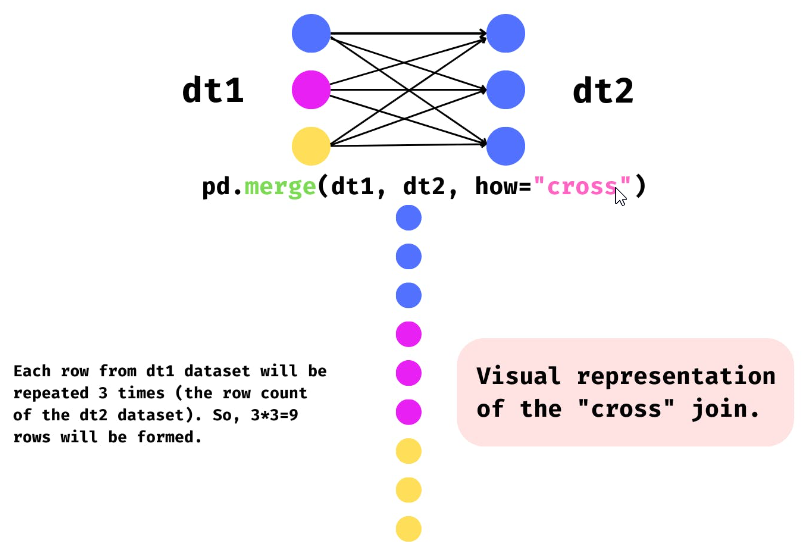

In [ ]:
df1

,a,b
0,foo,1
1,bar,2


In [ ]:
df2

,a,c
0,foo,3
1,baz,4


In [ ]:
df1.merge(df2, how='cross') # 모든 조합, 두 프레임 모두에서 데카르트 곱을 생성하고 왼쪽 키의 순서를 유지

,a_x,b,a_y,c
0,foo,1,foo,3
1,foo,1,baz,4
2,bar,2,foo,3
3,bar,2,baz,4


In [ ]:
df1 = pd.DataFrame({'left': ['foo', 'bar']})
df2 = pd.DataFrame({'right': [7, 8]})
df1

,left
0,foo
1,bar


In [ ]:
df2

,right
0,7
1,8


In [ ]:
df1.merge(df2, how='cross') # 두 프레임 모두에서 데카르트 곱을 생성하고 왼쪽 키의 순서를 유지

,left,right
0,foo,7
1,foo,8
2,bar,7
3,bar,8


---

### 정리하기

In [ ]:
## 1. 조건에 맞는 데이터만 추출하기
exam.query('english <= 80')

# 여러 조건 동시 충족
exam.query('nclass == 1 & math >= 50')

# 여러 조건 중 하나 이상 충족
exam.query('math >= 90 | english >= 90')
exam.query('nclass in [1, 3, 5]')

## 2. 필요한 변수만 추출하기
exam['math']                                 # 한 변수 추출
exam[['nclass', 'math', 'english']]          # 여러 변수 추출
exam.drop(columns = 'math')                  # 변수 제거
exam.drop(columns = ['math', 'english'])     # 여러 변수 제거

## 3. pandas 명령어 조합하기
exam.query('math >= 50')[['id', 'math']].head()

## 4. 순서대로 정렬하기
exam.sort_values('math')                     # 오름차순 정렬
exam.sort_values('math', ascending = False)  # 내림차순 정렬

# 여러 변수 기준 정렬
exam.sort_values(['nclass', 'math'], ascending = [True, False])

## 5. 파생변수 추가하기
exam.assign(total = exam['math'] + exam['english'] + exam['science'])

# 여러 파생변수 한 번에 추가하기
exam.assign(total = exam['math'] + exam['english'] + exam['science'],
            mean = (exam['math'] + exam['english'] + exam['science']) / 3)

# assign()에 np.where() 적용하기
exam.assign(test = np.where(exam['science'] >= 60, 'pass', 'fall'))

# 추가한 변수를 pandas 코드에 바로 활용하기
exam.assign(total = exam['math'] + exam['english'] + exam['science']) \
    .sort_values('total').head()

## 6. 집단별로 요약하기
exam.groupby('nclass').agg(mean_math = ('math', 'mean'))

# 각 집단별로 다시 집단 나누기
mpg.groupby(['manufacturer', 'drv']).agg(mean_cty = ('cty', 'mean'))

## 7. 데이터 합치기
pd.merge(test1, test2, how = 'left', on = 'id')  # 가로로 합치기
pd.concat([group_a, group_b])                    # 세로로 합치기

,id,test
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
0,6,70
1,7,83
2,8,65
3,9,95
4,10,80


# **merge() 시험 예상**

In [ ]:
df1 = pd.DataFrame([[1, 'apple'], [2, 'banana']],
                  columns = ['id', 'fruits'])
df1

,id,fruits
0,1,apple
1,2,banana


In [ ]:
df2 = pd.DataFrame([[1, 3000], [5, 500]],
                  columns = ['id', 'price'])
df2

,id,price
0,1,3000
1,5,500


In [ ]:
df1.merge(df2)

,id,fruits,price
0,1,apple,3000


In [ ]:
df1.merge(df2, how='inner')

,id,fruits,price
0,1,apple,3000


In [ ]:
df1.merge(df2, how='outer')

,id,fruits,price
0,1,apple,3000.0
1,2,banana,NaN
2,5,NaN,500.0


In [ ]:
df1.merge(df2, how='left')

,id,fruits,price
0,1,apple,3000.0
1,2,banana,NaN


In [ ]:
df1.merge(df2, how='right')

,id,fruits,price
0,1,apple,3000
1,5,NaN,500


In [ ]:
df1.merge(df2, how='cross')

,id_x,fruits,id_y,price
0,1,apple,1,3000
1,1,apple,5,500
2,2,banana,1,3000
3,2,banana,5,500


### seaborn dataset

In [ ]:
import seaborn as sns
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
mpg = sns.load_dataset("mpg")
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [ ]:
pg = sns.load_dataset("penguins")
pg

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [ ]:
import pandas as pd
pd.set_option('display.precision', 2)
pg.groupby('species').agg('mean')

<ipython-input-250-8b311012ed6f>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pg.groupby('species').agg('mean')


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.79,18.35,189.95,3700.66
Chinstrap,48.83,18.42,195.82,3733.09
Gentoo,47.50,14.98,217.19,5076.02


In [ ]:
# numpy만 가능
import numpy as np
np.set_printoptions(precision=4, suppress=False) # dataframe의 전체 반올림 설정 안되네,

In [ ]:
np.set_printoptions(precision=3)
np.array([np.pi])

array([3.142])

In [ ]:
pg.groupby(['species', 'island']).agg(['min', 'mean', 'max'])

<ipython-input-254-71b192ee9653>:1: FutureWarning: ['sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  pg.groupby(['species', 'island']).agg(['min', 'mean', 'max'])


bill_length_mm              bill_depth_mm               \
                               min   mean   max           min   mean   max   
species   island                                                             
Adelie    Biscoe              34.5  38.98  45.6          16.0  18.37  21.1   
          Dream               32.1  38.50  44.1          15.5  18.25  21.2   
          Torgersen           33.5  38.95  46.0          15.9  18.43  21.5   
Chinstrap Dream               40.9  48.83  58.0          16.4  18.42  20.8   
Gentoo    Biscoe              40.9  47.50  59.6          13.1  14.98  17.3   

                    flipper_length_mm                body_mass_g           \
                                  min    mean    max         min     mean   
species   island                                                            
Adelie    Biscoe                172.0  188.80  203.0      2850.0  3709.66   
          Dream                 178.0  189.73  208.0      2900.0  3688.39   
          Torgersen             176.0  191.20  210.0      2900.0  3706.37   
Chinstrap Dream                 178.0  195.82  212.0      2700.0  3733.09   
Gentoo    Biscoe                203.0  217.19  231.0      3950.0  5076.02   

                             
                        max  
species   island             
Adelie    Biscoe     4775.0  
          Dream      4650.0  
          Torgersen  4700.0  
Chinstrap Dream      4800.0  
Gentoo    Biscoe     6300.0

In [ ]:
import seaborn as sns
tip = sns.load_dataset("tips")
tip.sample(5)

,total_bill,tip,sex,smoker,day,time,size
176,17.89,2.00,Male,Yes,Sun,Dinner,2
98,21.01,3.00,Male,Yes,Fri,Dinner,2
233,10.77,1.47,Male,No,Sat,Dinner,2
189,23.10,4.00,Male,Yes,Sun,Dinner,3
105,15.36,1.64,Male,Yes,Sat,Dinner,2


In [ ]:
tip.groupby("sex")["total_bill"].agg("mean").to_frame()

,total_bill
sex,
Male,20.74
Female,18.06


In [ ]:
tip.groupby(["day", "time"])["tip"].agg(["min", "mean", "median", "max"])

min  mean  median    max
day  time                             
Thur Lunch   1.25  2.77    2.30   6.70
     Dinner  3.00  3.00    3.00   3.00
Fri  Lunch   1.58  2.38    2.20   3.48
     Dinner  1.00  2.94    3.00   4.73
Sat  Lunch    NaN   NaN     NaN    NaN
     Dinner  1.00  2.99    2.75  10.00
Sun  Lunch    NaN   NaN     NaN    NaN
     Dinner  1.01  3.26    3.15   6.50

<Axes: xlabel='day', ylabel='count'>

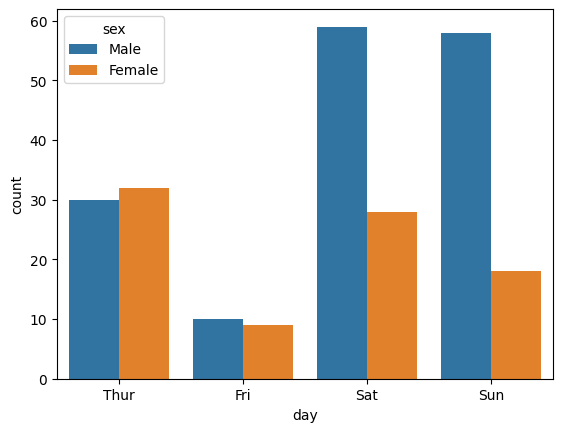

In [ ]:
sns.countplot(tip, x="day", hue="sex")